## Índices Mundiais

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

tickers = {'IBOV': '^BVSP', 'SP500': '^GSPC', 'Nasdaq': '^IXIC',
           'DAX': '^GDAXI', 'DowJones': '^DJI', 'India': '^BSESN',
           'Japao':'^N225'}

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Gerando um CSV a partir dos tickers acima

In [2]:
for k, v in tickers.items():
    df = web.DataReader(v, ds_yahoo, start, end)
    df.to_csv('csv/{}.csv'.format(k))

## Lendo os CSVs

In [3]:
ibov_df = pd.read_csv('csv/IBOV.csv', index_col=0)
sp500_df = pd.read_csv('csv/SP500.csv', index_col=0)
nasdaq_df = pd.read_csv('csv/Nasdaq.csv', index_col=0)
dax_df = pd.read_csv('csv/DAX.csv', index_col=0)
dji_df = pd.read_csv('csv/DowJones.csv', index_col=0)
india_df = pd.read_csv('csv/India.csv', index_col=0)
japao_df = pd.read_csv('csv/Japao.csv', index_col=0)

In [4]:
ibov_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000
mean,90577.340164,88931.024590,89699.528689,89810.827869,4.302086e+06,89810.827869
std,8099.323528,8122.845163,8136.598330,8143.699540,1.345423e+06,8143.699540
min,75370.000000,74275.000000,74680.000000,74657.000000,0.000000e+00,74657.000000
25%,84923.250000,82739.000000,83237.250000,83338.250000,3.681400e+06,83338.250000
50%,92626.500000,91425.000000,91873.000000,91924.500000,4.285800e+06,91924.500000
75%,97111.000000,95493.000000,96298.750000,96323.000000,4.937750e+06,96323.000000
max,106650.000000,104814.000000,105818.000000,105817.000000,9.999000e+06,105817.000000


## Gerando um CSV com a coluna de Fechamento Ajustado de todos os índices

In [5]:
data = pd.DataFrame()

for k, v in tickers.items():
    data[k] = web.DataReader(v, ds_yahoo, start, end)['Adj Close']

data.to_csv('csv/indices_adj_close.csv')

In [6]:
all_index_adj_close_df = pd.read_csv('csv/indices_adj_close.csv', index_col=0)

## Gráfico do rendimento dos índices normalizados

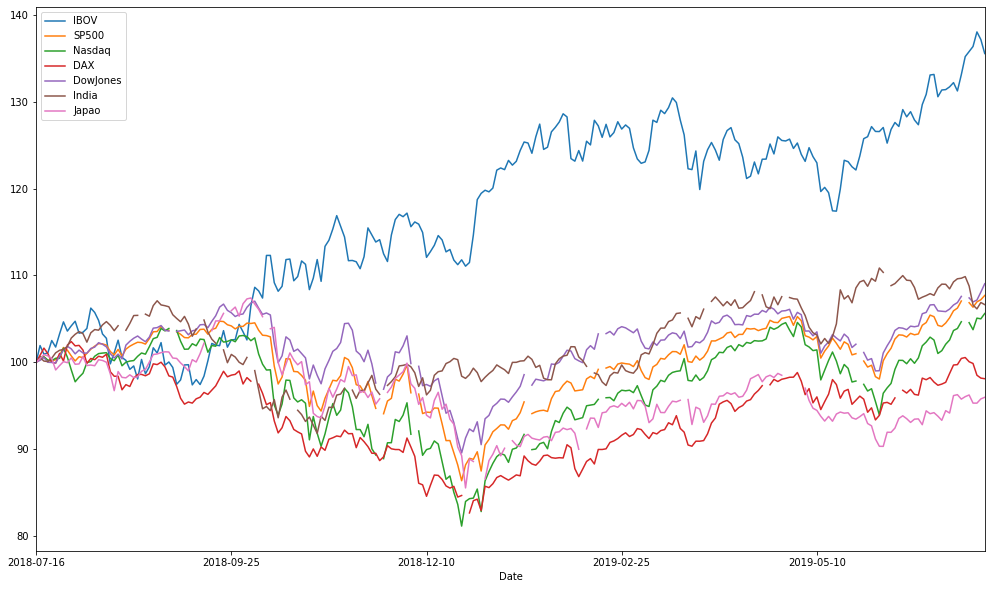

In [7]:
df_normalizado = all_index_adj_close_df / all_index_adj_close_df.iloc[0] * 100
df_normalizado.plot(figsize=(17,10));
#df_normalizado.head()

## Apenas índices estrangeiros

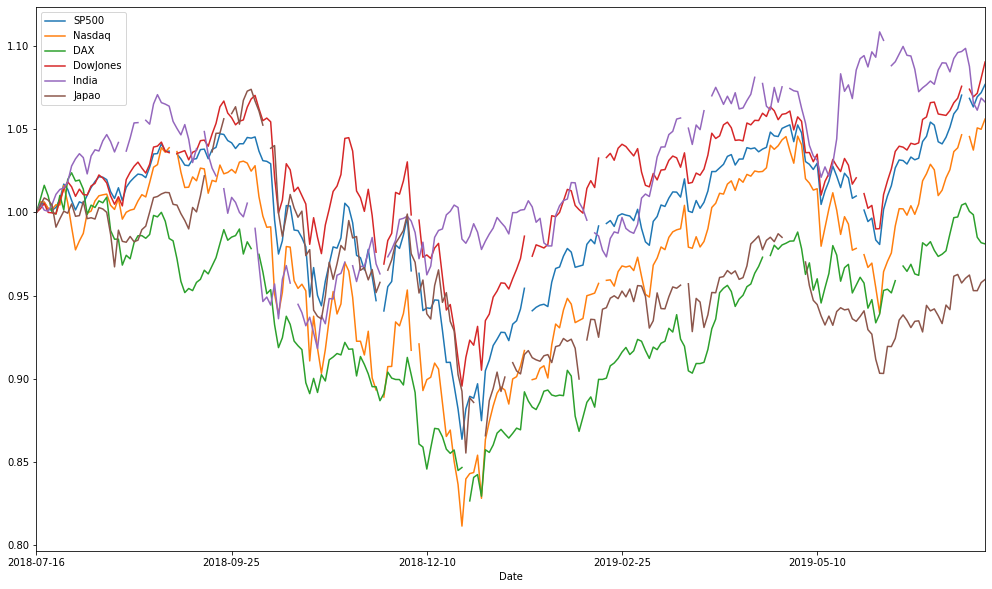

In [8]:
todos_indices_sem_ibov = all_index_adj_close_df.drop(labels='IBOV', axis=1, inplace=False)

(todos_indices_sem_ibov / todos_indices_sem_ibov.iloc[0]).plot(figsize=(17,10));

## Média anual de retorno dos índices

In [9]:
index_returns = (all_index_adj_close_df / all_index_adj_close_df.shift(1)) - 1
annual_ind_returns = index_returns.mean() * 246 # média de pregões no ano
round(annual_ind_returns * 100, 3)

IBOV        33.088
SP500       12.552
Nasdaq      10.497
DAX          0.873
DowJones    14.050
India       13.437
Japao       -4.192
dtype: float64

## Média anual de retorno apenas do IBOV

In [10]:
ibov_adj_close = all_index_adj_close_df.get('IBOV')
ibov_return = (ibov_adj_close / ibov_adj_close.shift(1)) - 1
annual_ibov_return = ibov_return.mean() * 246
round(annual_ibov_return * 100, 3)

33.088

## Correlação entre índices

In [11]:
import numpy as np
import seaborn as sns

In [12]:
log_returns = np.log(all_index_adj_close_df / all_index_adj_close_df.shift(1))
corr_index = log_returns.corr()

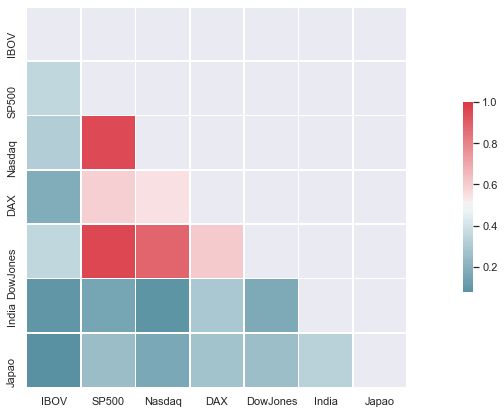

In [13]:
sns.set()

f, ax = plt.subplots(figsize=(20, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr_index, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_index, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [14]:
corr_index

,IBOV,SP500,Nasdaq,DAX,DowJones,India,Japao
IBOV,1.000000,0.357607,0.322938,0.185167,0.357831,0.096446,0.078074
SP500,0.357607,1.000000,0.956190,0.595347,0.963469,0.156181,0.251360
Nasdaq,0.322938,0.956190,1.000000,0.542904,0.880098,0.090154,0.166496
DAX,0.185167,0.595347,0.542904,1.000000,0.603884,0.295527,0.278018
DowJones,0.357831,0.963469,0.880098,0.603884,1.000000,0.175741,0.255535
India,0.096446,0.156181,0.090154,0.295527,0.175741,1.000000,0.334833
Japao,0.078074,0.251360,0.166496,0.278018,0.255535,0.334833,1.000000
